In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.patheffects as pe
import os
import numpy as np
import re
from scipy.optimize import curve_fit

In [2]:
from plotter import load_vector, load_3D_vector

Energy:
O_tmax = -0.7885418666666674, with t_eq: 2000 and t_max: 8000
${S_{tmax}}^2 = 0.440$ 
Magnetization:
O_tmax = -0.0018394666666666777, with t_eq: 2000 and t_max: 8000
${S_{tmax}}^2 = 1.246$ 


In [3]:
T_c = 2.269185
T = 3.000000
L = 25
sweeps = 10000
filepath = "./data/T={:.6f}/".format(T)
filename_E = "energies_L="+str(L)+"_sweeps="+str(sweeps)+".txt"
filename_M = "magnetizations_L="+str(L)+"_sweeps="+str(sweeps)+".txt"
filename_spins = "saved_spin_values_L="+str(L)+"_sweeps="+str(sweeps)+".txt"

# Energy and Magnetization plots

In [4]:
sweeps = 10000
Ts = [1.000000, T_c, 3.00000]
filename_t = "timesteps_L="+str(L)+"_sweeps="+str(sweeps)+".txt"
filename_E = "energies_L="+str(L)+"_sweeps="+str(sweeps)+".txt"
filename_M = "magnetizations_L="+str(L)+"_sweeps="+str(sweeps)+".txt"
filename_spins = "saved_spin_values_L="+str(L)+"_sweeps="+str(sweeps)+".txt"

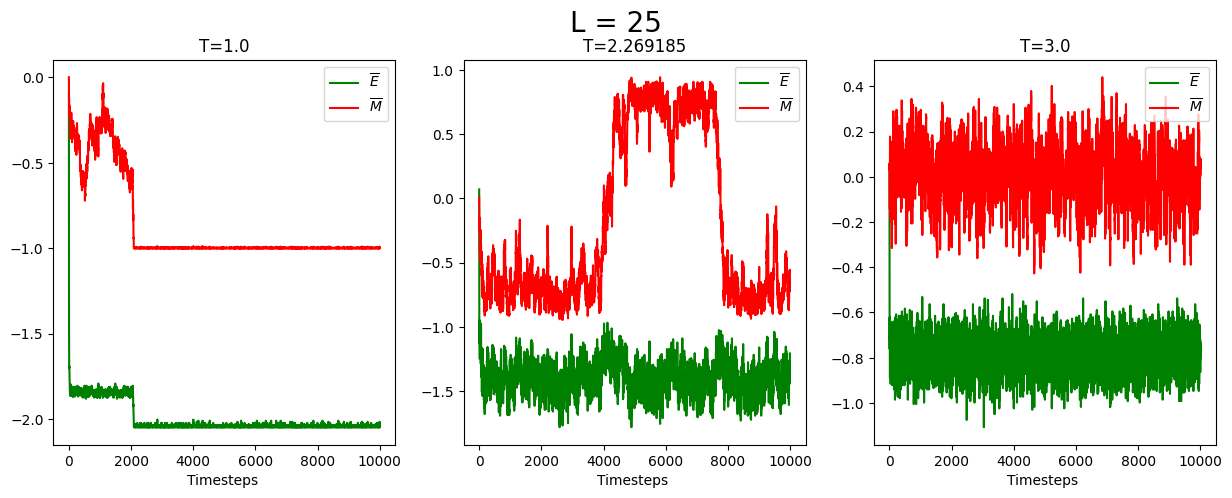

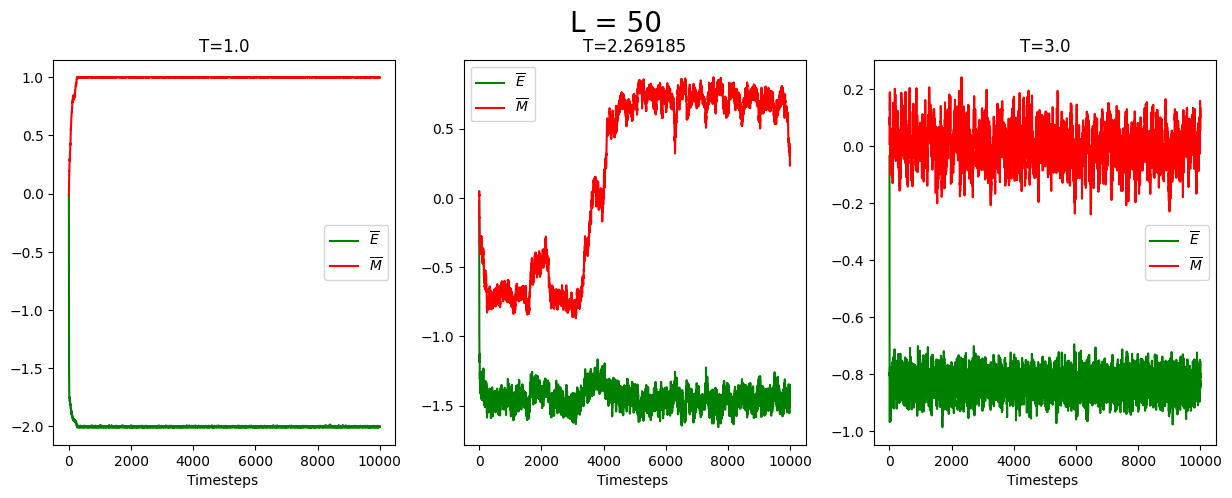

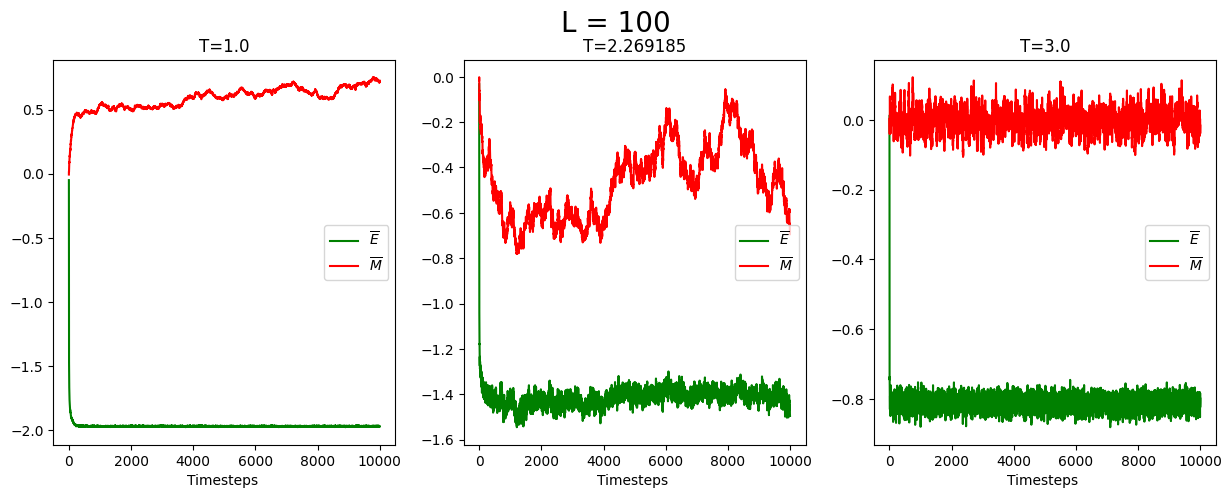

In [5]:
 # Create a plot of energy vs. timesteps
Ls = [25,50,100]
for L in Ls:
    filename_E = "energies_L="+str(L)+"_sweeps="+str(sweeps)+".txt"
    filename_M = "magnetizations_L="+str(L)+"_sweeps="+str(sweeps)+".txt"
    fig,axes = ax.subplots(1,3)
    for i in range(len(axes)):
        T = Ts[i]
        filepath = "./data/T={:.6f}/".format(T)
        timesteps = np.array(load_vector(filepath + filename_t))
        energies =  np.array(load_vector(filepath + filename_E))
        magnetizations = np.array(load_vector(filepath + filename_M))
        N = L**2
        avg_energies = energies/N
        avg_magnetization = magnetizations/N
        axes[i].plot(timesteps, avg_energies, linestyle='-', color='g', label=r'$\overline{E}$')
        axes[i].plot(timesteps, avg_magnetization, linestyle='-', color='r', label=r'$\overline{M}$')

        # Add labels and a legend
        axes[i].set_xlabel('Timesteps ')
        axes[i].set_title('T='+str(T))
        axes[i].legend()
    fig.suptitle(f"L = {L}", size=20)
    fig.set_size_inches(15,5)


### Equilibrium Times
#### L=25
For T=1, the system clearly hits equilibrium just around 2000 Monte Carlo sweeps (timesteps), while for T=$T_c$, the systems seems to be in equilibrium pretty early, but hits a metastable state around 4000-8000 sweeps. For the high temperature, T=3, the system hits equilibrium right away, with thermal fluctuations dominating, making the spins never settling between -1 or 1.
#### L=50
For T=1, the system hits equilibrium after some hundred sweeps, while for T=$T_c$, the system struggles to hit a stable phase, and somwhat resembles the pattern for L=25, with the system switching between metastable phases. For T=3, the system hits equilibriums straight away, as for the previous case with less spins.
#### L=100
The system doesn't clearly hit an equilibrium as in the two previos spin cases, but as we can see from the energy and low fluctuations in magnetization, it seems to have hit a pretty stable phase. For T=$T_c$, this system also struggle to find equilibrium, and fluctuates alot in magnetizations, but has hit a pretty stable phase in terms of energy. The high temperature is pretty similar to the two previous spin cases, both in regards to magnetization and energy.

In [6]:
#Make table of equilibrium times

## Averages and fluctuations

In [7]:
sweeps = 10000
Ts = [1.000000, T_c, 3.00000]
filename_E = "energies_L="+str(L)+"_sweeps="+str(sweeps)+".txt"
filename_M = "magnetizations_L="+str(L)+"_sweeps="+str(sweeps)+".txt"

In [14]:
def print_observables(filepath, filename_E, filename_M, T, L, save=False):
    match(L):
        case 25:
            t_eq = 2000
        case 50:
            t_eq = 4500
        case 100:
            t_eq = 2000
    energies =  np.array(load_vector(filepath + filename_E))[t_eq:]
    magnetizations = np.array(load_vector(filepath + filename_M))[t_eq:] #Cutting of data before equilibrium

    kb = 1
    average_enery = sum(energies)/len(energies)
    average_enery_squared = sum(energies**2)/len(energies)
    average_mag = sum(magnetizations)/len(magnetizations)
    average_mag_squared = sum(magnetizations**2)/len(magnetizations)

    Cv = (average_enery_squared - average_enery**2)/(kb*T**2*L**2) #Skal jeg ha L**2?
    Nxt = (average_mag_squared - average_mag**2)/(kb*T*len(magnetizations))
    print("Results for L=", L, " and T=", T, ":")
    print("-----------------------------------")
    print("Specific heat Cv = ", Cv)
    print("Magnetic susceptibily: ", Nxt)
    print("-----------------------------------")
    return Cv, Nxt

In [15]:
# from plotter import print_observables
Ls = [25,50,100]
for L in Ls:
    filename_E = "energies_L="+str(Ls[i])+"_sweeps="+str(sweeps)+".txt"
    filename_M = "magnetizations_L="+str(Ls[i])+"_sweeps="+str(sweeps)+".txt"
    filename_spins = "saved_spin_values_L="+str(Ls[i])+"_sweeps="+str(sweeps)+".txt" 
    for T in Ts:
        filepath = "./data/T={:.6f}/".format(T)
        print_observables(filepath, filename_E, filename_M, T, L)
        print()

#Skrive hvilke equilibrium times som er brukt?
#Har jeg riktig susceptibility formel?

Results for L= 25  and T= 1.0 :
-----------------------------------
Specific heat Cv =  0.7737960816383361
Magnetic susceptibily:  48.514121522468514
-----------------------------------

Results for L= 25  and T= 2.269185 :
-----------------------------------
Specific heat Cv =  32.18263636761016
Magnetic susceptibily:  133.4832677560446
-----------------------------------

Results for L= 25  and T= 3.0 :
-----------------------------------
Specific heat Cv =  6.339744494177236
Magnetic susceptibily:  4.656514106989584
-----------------------------------

Results for L= 50  and T= 1.0 :
-----------------------------------
Specific heat Cv =  0.18268000798225403
Magnetic susceptibily:  32.94440229647539
-----------------------------------

Results for L= 50  and T= 2.269185 :
-----------------------------------
Specific heat Cv =  5.981320982235581
Magnetic susceptibily:  108.54383691452907
-----------------------------------

Results for L= 50  and T= 3.0 :
----------------------------

There is a clear trend in every case of number of spins, that when T=$T_c$, the magnetic susceptiblity and the specific heat is highest, which is also the results one would expect when looking at experimental results. 

## Integrated correlation time and critical slowing-down

### Autocorrelation time

In [ ]:
#Be ware, takes a long time to run

In [16]:
sweeps = 10000
Ts = [1.000000, T_c, 3.00000]
filename_E = "energies_L="+str(L)+"_sweeps="+str(sweeps)+".txt"
filename_M = "magnetizations_L="+str(L)+"_sweeps="+str(sweeps)+".txt"

In [77]:
def autocorrelation_time(filepath, filename_E, filename_M, L, t, ax, save=False):
    match(L):
        case 25:
            t_eq = 2000
        case 50:
            t_eq = 4500
        case 100:
            t_eq = 2000
    energies =  np.array(load_vector(filepath + filename_E))[t_eq:]
    magnetizations = np.array(load_vector(filepath + filename_M))[t_eq:] #Cutting of data after equilibrium
    #Averages over each spin
    energies /= L**2
    magnetizations /= L**2

    def Co(t, O):
        Co_first = 0
        Co_second = 0
        Co_third = 0
        t_max = len(O)
        div_fac = 1/(t_max - t)
        for t_it in range(t_max-t):
            Co_first += O[t_it] * O[t_it + t] * div_fac
            Co_second += O[t_it] * div_fac
            Co_third += O[t_it + t] * div_fac

        return Co_first - Co_second*Co_third


    Cm_t = [Co(t_it, magnetizations) for t_it in range(t)]
    Ce_t = [Co(t_it, energies) for t_it in range(t)]
    ts = np.linspace(0,t, dtype=int, num=len(Cm_t))
    # print(f"Magnetic Co: {Co(t, magnetizations)}")
    # print(f"Energy Co: {Co(t, energies)}")
    # print(f"len mag: {len(magnetizations)}, len cm_t: {len(Cm_t)}, len ts: {len(ts)}")

    #Plotting and fitting section
    f = lambda t,tau,a,b: a + b*np.e**(-t/tau) #Add a c?
    popt_mag, pcov_mag = curve_fit(f, ts, Cm_t )
    popt_en, pcov_en = curve_fit(f, ts, Ce_t)

    perr_mag = np.sqrt(np.diag(pcov_mag))
    perr_en = np.sqrt(np.diag(pcov_en))
    # print(f"Tau for magnetization = {popt_mag[0]} ± {perr_mag[0]}")
    # print(f"Tau for energy = {popt_en[0]} ± {perr_en[0]}")

    #---------Magnetization------------
    ax.plot(ts, Cm_t, label=r"$C_m(t)$")
    ax.plot(ts, f(ts, *popt_mag), label=r"$\tau_m$ fitted %3.3f ± %3.3f" % (popt_mag[0], perr_mag[0]))
    ax.set_xlabel("time (MC steps per spin)")
    ax.legend()
    #---------Energy-------------
    ax.plot(ts, Ce_t, label=r"$C_e(t)$")
    ax.plot(ts, f(ts, *popt_en), label=r"$\tau_e$ fitted = %3.3f ± %3.3f" % (popt_en[0], perr_en[0]))
    ax.set_xlabel("time (MC steps per spin)")
    ax.legend()

#Lage separate magnet og energiplot?

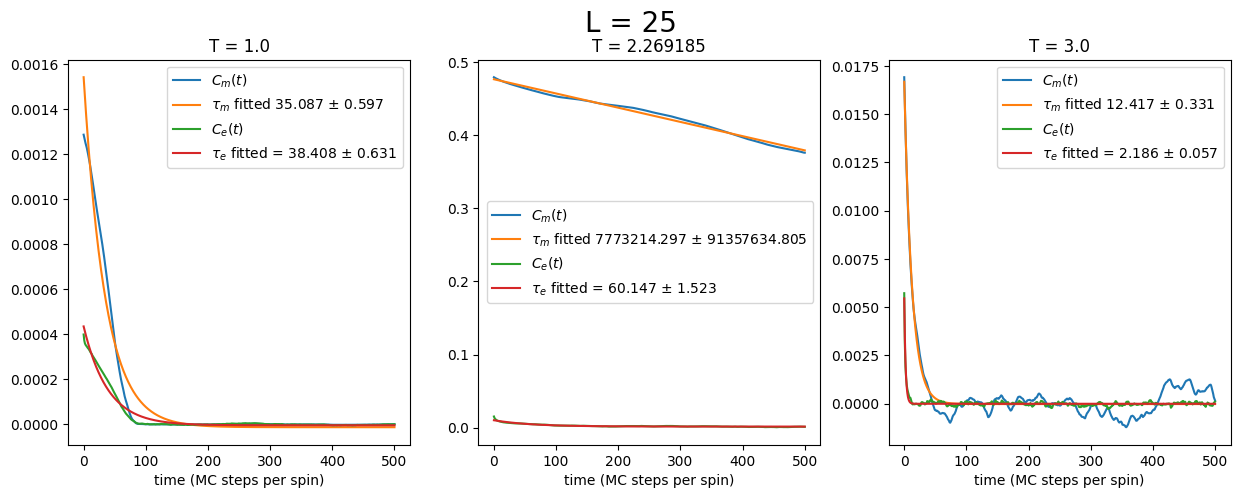

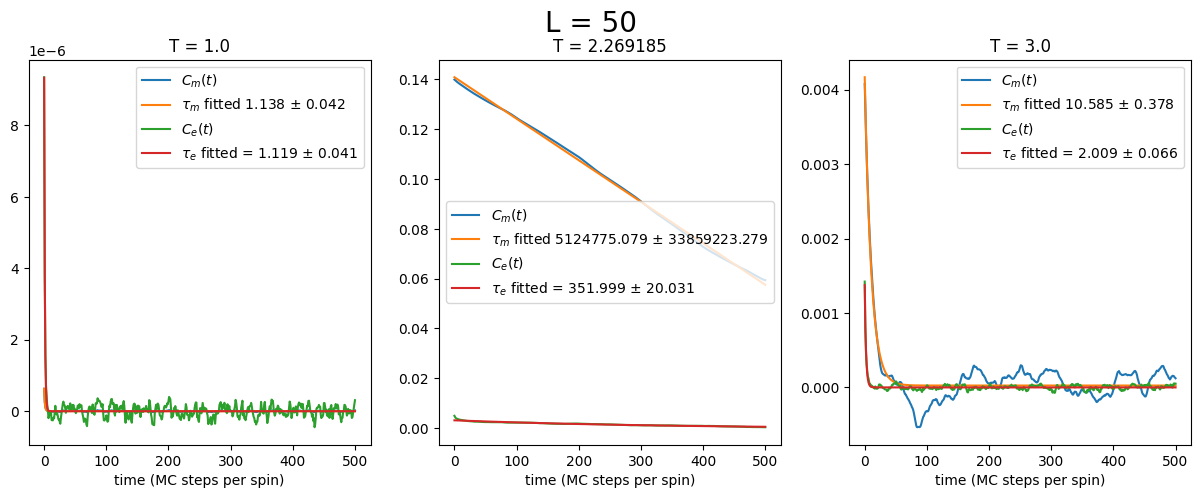

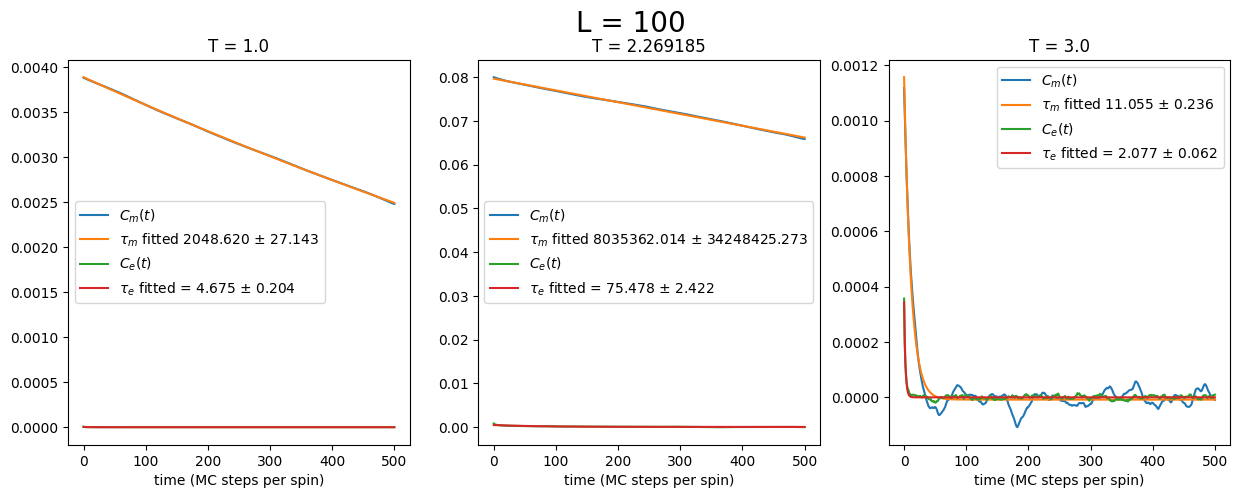

In [78]:
Ls = [25, 50, 100]
for L in Ls:
    filename_t = "timesteps_L="+str(L)+"_sweeps="+str(sweeps)+".txt"
    filename_E = "energies_L="+str(L)+"_sweeps="+str(sweeps)+".txt"
    filename_M = "magnetizations_L="+str(L)+"_sweeps="+str(sweeps)+".txt"
    fig, axes = plt.subplots(1,3)
    for i in range(len(Ts)):
        filepath = "./data/T={:.6f}/".format(Ts[i])
        autocorrelation_time(filepath, filename_E, filename_M, L, 500, axes[i], False)
        axes[i].set_title("T = "+str(Ts[i]))
    fig.suptitle(f"L = {L}", size=20)
    fig.set_size_inches(15,5)
    plt.show()

In [37]:
#Make table of tau results for error calculations
tau_e_25 = {"T_l": 38.4083437296976, "T_c": 60.146693928364236, "T_h": 2.18631973644625}
tau_m_25 = {"T_l": 35.08729440765177, "T_c": 7773214.297053239, "T_h": 12.417309221295735}
tau_e_50 = {"T_l": 1.1188744735978795, "T_c": 35.53687759713593, "T_h": 2.008804006545246}
tau_m_50 = {"T_l": 1.1378899434515168, "T_c": 45.169967939971, "T_h": 10.585332744930643}
tau_e_100 = {"T_l": 4.674815400971074, "T_c": 62.44913723144746, "T_h": 2.0767445231915804}
tau_m_100 = {"T_l": 2048.6202953926613, "T_c": 1092.8974258142212, "T_h": 11.055488813362354}

taus = [(tau_e_25, tau_m_25), (tau_e_50, tau_m_50), (tau_e_100, tau_m_100)]

### Error bars

In [38]:
S_tmax_squared = lambda tau, dt, tmax, tau_eq, O, Otmax: (1 + 2*tau/dt)/(tmax - tau_eq - 1) * sum([(O[t] -Otmax)**2 for t in range(tau_eq, tmax)])
O_tmax = lambda tmax, tau_eq, O :1/(tmax - tau_eq)*sum([O[t] for t in range(tau_eq, tmax)])

In [71]:
dt = 1 #Standard
Ls = [25, 50, 100]
for i in range(len(Ls)):
    print("Running L = ", Ls[i])
    filename_E = "energies_L="+str(Ls[i])+"_sweeps="+str(sweeps)+".txt"
    filename_M = "magnetizations_L="+str(Ls[i])+"_sweeps="+str(sweeps)+".txt"
    match(Ls[i]):
        case 25:
            tau_eq = 2000
        case 50:
            tau_eq = 4500
        case 100:
            tau_eq = 2000
    energies =  np.array(load_vector(filepath + filename_E))[tau_eq:]
    magnetizations = np.array(load_vector(filepath + filename_M))[tau_eq:] #Cutting of data after equilibrium
    #Averages over each spin
    energies /= Ls[i]**2
    magnetizations /= Ls[i]**2
    tmax = len(energies)

    tau_e, tau_m = taus[i] #Results from previous runs

    print("-------------------S Energies-----------------------")
    for temp, tau in tau_e.items():
        O_tmax_e = O_tmax(tmax, tau_eq, energies)
        S_tmax_squared_e = S_tmax_squared(tau, dt, tmax, tau_eq, energies, O_tmax_e)
        print(f"{temp}, tau={round(tau, 3)}, O_tmax={round(O_tmax_e,3)}:    {np.sqrt(S_tmax_squared_e)}")
    # print("---------------------End--------------------------------")

    print("-------------------S Magnetizations-----------------------")
    for temp, tau in tau_m.items():
        O_tmax_m = O_tmax(tmax, tau_eq, magnetizations)
        S_tmax_squared_m = S_tmax_squared(tau, dt, tmax, tau_eq, magnetizations, O_tmax_e)
        print(f"{temp}, tau={round(tau, 3)}, O_tmax={round(O_tmax_m,3)}:    {np.sqrt(S_tmax_squared_m)}")
    print("---------------------End--------------------------------")


Running L =  25
-------------------S Energies-----------------------
T_l, tau=38.408, O_tmax=-1.402:    1.115581710156755
T_c, tau=60.147, O_tmax=-1.402:    1.3927833902158782
T_h, tau=2.186, O_tmax=-1.402:    0.2931290529727994
-------------------S Magnetizations-----------------------
T_l, tau=35.087, O_tmax=0.141:    14.216277664258564
T_c, tau=7773214.297, O_tmax=0.141:    6644.139557224192
T_h, tau=12.417, O_tmax=0.141:    8.564942263373247
---------------------End--------------------------------
Running L =  50
-------------------S Energies-----------------------
T_l, tau=1.119, O_tmax=-1.342:    0.10417640542260388
T_c, tau=35.537, O_tmax=-1.342:    0.4915145266587213
T_h, tau=2.009, O_tmax=-1.342:    0.1296869115646392
-------------------S Magnetizations-----------------------
T_l, tau=1.138, O_tmax=0.222:    2.878782939973117
T_c, tau=45.17, O_tmax=0.222:    15.201341497225522
T_h, tau=10.585, O_tmax=0.222:    7.489294852128263
---------------------End-------------------------

## Finite-size analysis and estimates of the critical exponents

### First test

In [51]:
sweeps = 10000
Ts = [1.000000, T_c, 3.00000]

Running L =  25
B  = 4462.446320377188 ± 234.96578300849637
v  = 0.09218549961220492 ± 0.009821992876547506
Running L =  50


C:\Users\iver_y\AppData\Local\Temp\ipykernel_18932\2618113918.py:25: RuntimeWarning: overflow encountered in power
  f = lambda B,v,a,b: a + b*L**(-B/v)


c:\Users\iver_y\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\iver_y\AppData\Local\Temp\ipykernel_18932\2618113918.py:34: RuntimeWarning: invalid value encountered in scalar divide
  axes.plot(ts, f(ts, *popt_mag), label=r"$\beta/v$ fitted %3.3f ± %3.3f" % (popt_mag[0]/popt_mag[1], perr_mag[0]/perr_mag[1]))


B  = 0.06942366565324698 ± inf
v  = -0.4876344062764907 ± inf
Running L =  100
B  = 45035.86083097291 ± 1995.1969879148924
v  = 1.1674617610465678 ± 0.049067236938801315


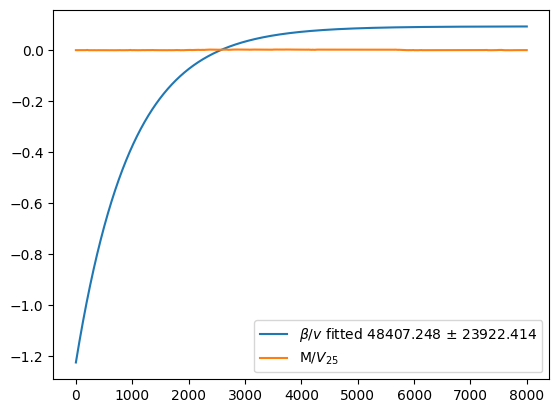

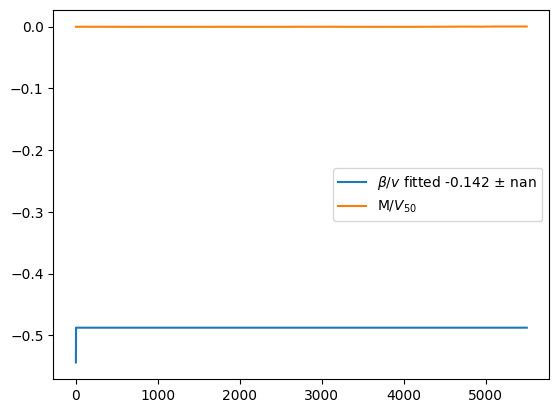

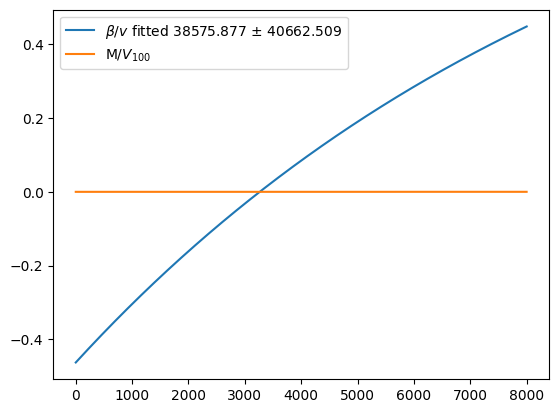

In [72]:
dt = 1 #Standard
Ls = [25, 50, 100]
for i in range(len(Ls)):
    fig, axes = plt.subplots()
    print("Running L = ", Ls[i])
    filename_E = "energies_L="+str(Ls[i])+"_sweeps="+str(sweeps)+".txt"
    filename_M = "magnetizations_L="+str(Ls[i])+"_sweeps="+str(sweeps)+".txt"
    filepath = "./data/T={:.6f}/".format(Ts[1]) #Tc
    match(Ls[i]):
        case 25:
            tau_eq = 2000
        case 50:
            tau_eq = 4500
        case 100:
            tau_eq = 2000

    energies =  np.array(load_vector(filepath + filename_E))[tau_eq:]
    magnetizations = np.array(load_vector(filepath + filename_M))[tau_eq:] #Cutting of data after equilibrium
    #Averages over each spin
    energies /= Ls[i]**2
    magnetizations /= Ls[i]**2
    tmax = len(energies)

    #Fitting -B/v
    f = lambda B,v,a,b: a + b*L**(-B/v) 
    ts = np.linspace(0,tmax, dtype=int, num=len(magnetizations))
    popt_mag, pcov_mag = curve_fit(f, ts, magnetizations)

    perr_mag = np.sqrt(np.diag(pcov_mag))
    print(f"B  = {popt_mag[0]} ± {perr_mag[0]}")
    print(f"v  = {popt_mag[1]} ± {perr_mag[1]}")

    #---------Magnetization------------
    axes.plot(ts, f(ts, *popt_mag), label=r"$\beta/v$ fitted %3.3f ± %3.3f" % (popt_mag[0]/popt_mag[1], perr_mag[0]/perr_mag[1]))
    axes.plot(magnetizations/(Ls[i]**2), label=r"M/$V_{{{}}}$".format(Ls[i])) #V=L^2?
    axes.legend()


In [88]:
Ls = np.linspace(10,100,num=10, dtype=int)
M_T = []
for i in range(len(Ls)):
    print("Running L = ", Ls[i])
    filename_E = "energies_L="+str(Ls[i])+"_sweeps="+str(sweeps)+".txt"
    filename_M = "magnetizations_L="+str(Ls[i])+"_sweeps="+str(sweeps)+".txt"
    filepath = "./data/T={:.6f}/".format(Ts[1]) #Tc
    tau_eq = 3000
    energies =  np.array(load_vector(filepath + filename_E))[tau_eq:]
    magnetizations = np.array(load_vector(filepath + filename_M))[tau_eq:] #Cutting of data after equilibrium
    #Averages over each spin
    energies /= Ls[i]**2
    magnetizations /= Ls[i]**2

    avg_magnetization = sum(magnetizations)/len(magnetizations)
    M_T.append(avg_magnetization/L**2)

plt.plot(Ls, M_T)
plt.xlabel("L")
plt.ylabel("Magnetization")
plt.show()

Running L =  10
Running L =  20
ERROR: File './data/T=3.000000/energies_L=20_sweeps=10000.txt' not found


IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

### $C_v$ and $X$

In [316]:
def calculate_avg_mag(filename_M, L, kb = 1):
    match(L):
        case 25:
            t_eq = 2000
        case 50:
            t_eq = 4500
        case 100:
            t_eq = 2000
        case _:
            t_eq = 2000
    magnetizations = np.array(load_vector(filename_M))[t_eq:] #Cutting of data after equilibrium
    return np.mean(magnetizations)/L**2

In [124]:
def calculate_mag_susc(filename_M, L, T, kb = 1):
    match(L):
        case 25:
            t_eq = 2000
        case 50:
            t_eq = 4500
        case 100:
            t_eq = 2000
    magnetizations = np.array(load_vector(filename_M)[t_eq:]) 
    M_sq = np.mean((magnetizations/L**2)**2) #Constant, since spin is either +1 or -1, so avg is just 1
    avg_magnetization = np.mean(magnetizations)/L**2 #Avg mag per spin
    mag_susc = lambda kb, T, M_sq, M : (M_sq - M**2)/(kb*T) #M_sq is the average of each spin squared
    
    return mag_susc(kb, T, M_sq, avg_magnetization)


In [293]:
def calculate_specific_heat(filename_E, L, T, kb = 1):
    match(L):
        case 25:
            t_eq = 2000
        case 50:
            t_eq = 4500
        case 100:
            t_eq = 2000
        case _:
            t_eq = 2000
    energies = np.array(load_vector(filename_E)[t_eq:]) 
    E_sq = np.mean((energies/L**2)**2) # Square of the average energy
    avg_energy = np.mean(energies)/L**2 # Avg energy per spin
    specific_heat = lambda kb, T, E_sq, E : (E_sq - E**2)/(kb*T**2) # E_sq is the square of the average energy
    
    return specific_heat(kb, T, E_sq, avg_energy)

In [92]:
T_c = 2.269185
T = 3.000000
L = 25
sweeps = 10000
filepath = "./data/T={:.6f}/".format(T)
filename_E = "energies_L="+str(L)+"_sweeps="+str(sweeps)+".txt"
filename_M = "magnetizations_L="+str(L)+"_sweeps="+str(sweeps)+".txt"

print(calculate_mag_susc(filepath + filename_M, sweeps, L, T))

8.999992342604159


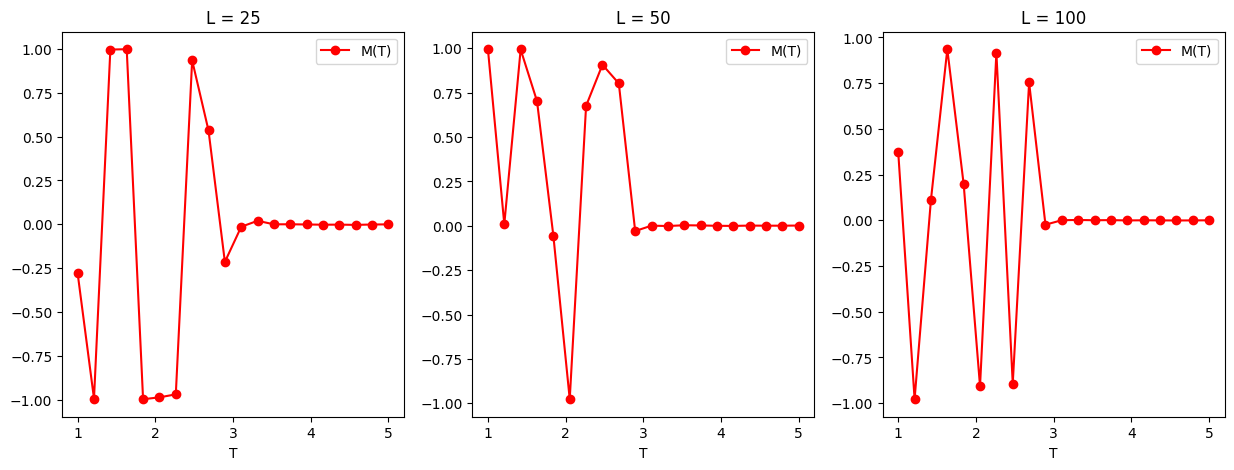

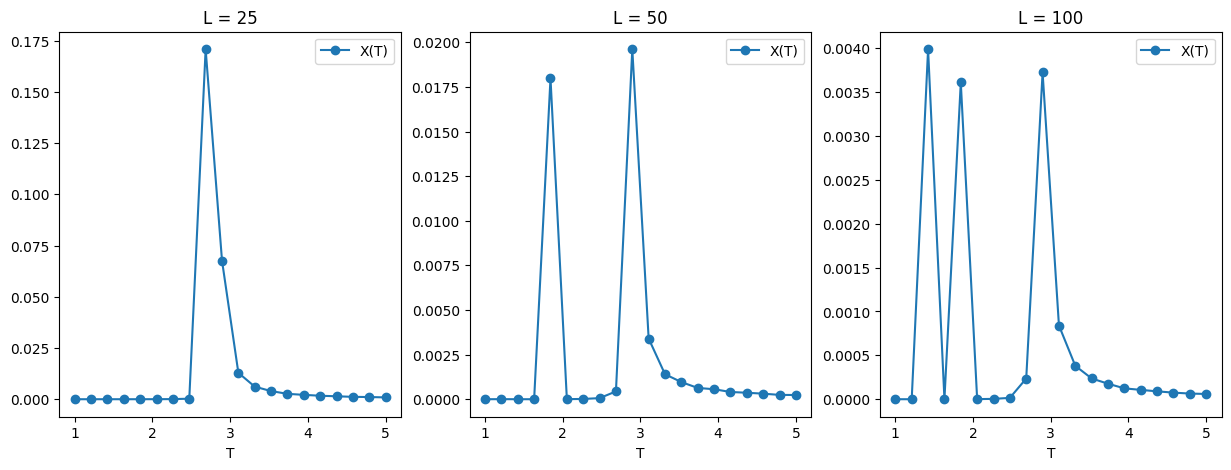

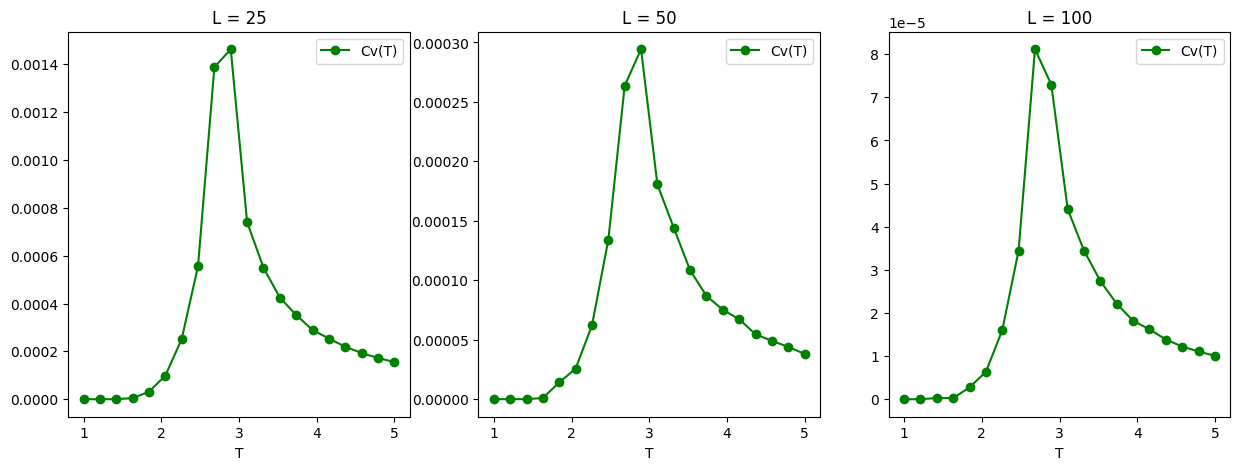

In [315]:
Ls_X = [25, 50, 100]
Ts_X = [1.000000, T_c, 3.00000]
Ts_sweeps_real = np.linspace(1,5,num=20)
sweeps = 10000
fig_M, axes_M = plt.subplots(1,3)
fig_X, axes_X = plt.subplots(1,3)
fig_Cv, axes_Cv = plt.subplots(1,3)
all_Ms = []
all_Xs = []
all_Cvs = []
for i in range(len(Ls_X)):
    # filename_M = "magnetizations_L="+str(Ls_X[i])+"_sweeps="+str(sweeps)+".txt"
    # filepath = "./data/T={:.6f}/".format(Ts[1]) 
    filepath = "./data/tempsweeps/L="+str(Ls_X[i])+"/"

    Ms = []
    Xs = []
    Cvs = []
    for j in range(len(Ts_sweeps_real)):
        filename_M = f"magnetizations_Tnum={j +  1}_sweeps=10000.txt"
        filename_E = f"energies_Tnum={j +  1}_sweeps=10000.txt"
        
        M = calculate_avg_mag(filepath + filename_M, Ls_X[i])
        X = calculate_mag_susc(filepath + filename_M, Ls_X[i], Ts_sweeps_real[j])
        Cv = calculate_specific_heat(filepath + filename_E, Ls_X[i], Ts_sweeps_real[j])
        Ms.append(M)
        Xs.append(X)
        Cvs.append(Cv)


    axes_M[i].plot(Ts_sweeps_real, Ms, "-o" ,label=f"M(T)", color="r")
    axes_M[i].set_title(f"L = {Ls_X[i]}")
    axes_M[i].set_xlabel("T")
    axes_M[i].legend()

    axes_X[i].plot(Ts_sweeps_real, Xs, "-o" ,label=f"X(T)")
    axes_X[i].set_title(f"L = {Ls_X[i]}")
    axes_X[i].set_xlabel("T")
    axes_X[i].legend()

    axes_Cv[i].plot(Ts_sweeps_real, Cvs, "-o" ,label=f"Cv(T)", color="g")
    axes_Cv[i].set_title(f"L = {Ls_X[i]}")
    axes_Cv[i].legend()
    axes_Cv[i].set_xlabel("T")


    all_Ms.append(Ms)
    all_Xs.append(Xs)
    all_Cvs.append(Cvs)

fig_M.set_size_inches(15,5)
fig_X.set_size_inches(15,5)
fig_Cv.set_size_inches(15,5)
plt.show()

Max X around T=2.8-3.0

Max $C_v$ around T=2.8-3.0

### Critical exponents

In [133]:
#Temp nr. 9 is close enough to Tc in both C_v and X, so we use that
Tc_num = 9
Tc_ce = Ts_sweeps_real[Tc_num-1] #0 indexed


In [296]:

def fit_gamma(Tc_num, L_int, Xs, ax):
    L = Ls_X[L_int]
    def power_law(x, a, y):
        return a * x**(-y)

    Ts_gamma = Ts_sweeps_real[Tc_num-1:] # Temperatures
    Xs_gamma = Xs[L_int][Tc_num-1:] #[L][T]
    # Cvs_gamma = all_Cvs[0][Tc_num-1:]

    # Fit power law to data
    popt, pcov = curve_fit(power_law, Ts_gamma - Tc_ce, Xs_gamma)

    # Plot data and fit
    ax.plot(Ts_gamma - Tc_ce, Xs_gamma, '-o', label='data')
    ax.plot(Ts_gamma - Tc_ce, power_law(abs(Ts_gamma - Tc_ce), *popt), '-', label="fit")
    ax.set_xlabel('T - Tc')
    ax.set_ylabel('χ')
    ax.legend()

    print(f"Estimated critical exponent gamma: {popt[1]},\ta: {popt[0]}")#, {popt[2]}")
    # print(f"B/v: {popt[1]/popt[2]}")

    return popt[1]

Estimated critical exponent gamma: 2.23356688831244,	a: 0.002079104124358819
Estimated critical exponent gamma: 2.401614164891721,	a: 0.00046411998857059407
Estimated critical exponent gamma: 2.0547248704611,	a: 0.0001512024981571134


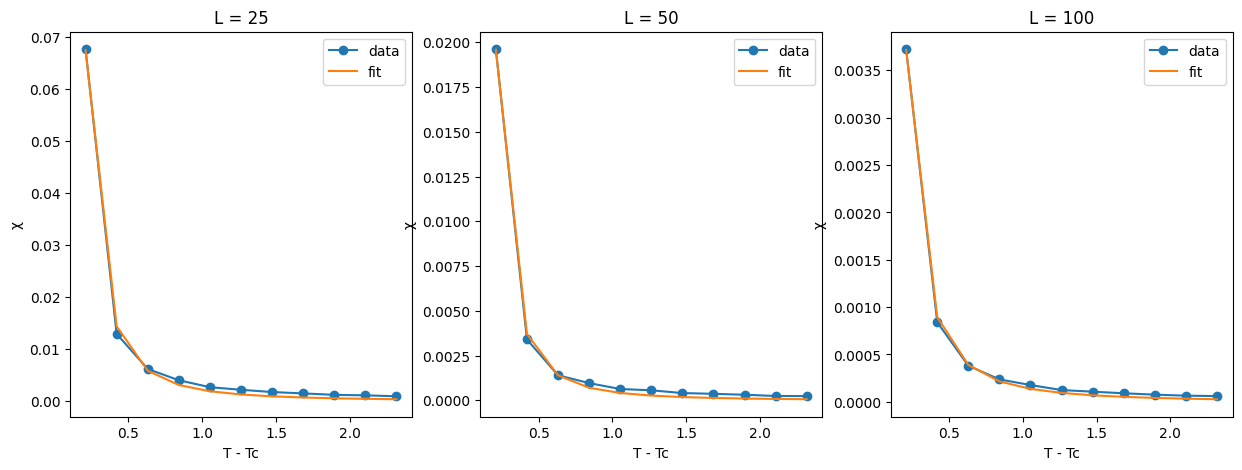

In [297]:
Tc_num = 10
fig_gamma, axes_gamma = plt.subplots(1,3)
for i in range(len(axes_gamma)):
    gamma = fit_gamma(Tc_num, i, all_Xs, axes_gamma[i])
    axes_gamma[i].set_title(f"L = {Ls_X[i]}")

fig.suptitle(r"\gamma estimate", size=20)
fig.legend()
fig_gamma.set_size_inches(15,5)
plt.show()

In [351]:

def fit_beta(Tc_num, L_int, all_Ms, ax):
    L = Ls_X[L_int]
    def power_law(x, a, b):
        return a * x**(b)

    Ts_beta = Ts_sweeps_real[Tc_num-1:] # Temperatures
    Ms_beta = all_Ms[L_int][Tc_num-1:] #[L][T]

    # Fit power law to data
    p0 = [1, 0.125]
    popt, pcov = curve_fit(power_law, Ts_beta - Tc_ce, Ms_beta, p0=p0, maxfev=10000)

    # Plot data and fit
    ax.plot(Ts_beta - Tc_ce, Ms_beta, '-o', label='data')
    ax.plot(Ts_beta - Tc_ce, power_law(abs(Ts_beta - Tc_ce), *popt), '-', label="fit")
    ax.set_xlabel('T - Tc')
    ax.set_ylabel('M')
    ax.legend()

    print(f"Estimated critical exponent beta: {popt[1]},\trest: {popt[0]}")

    return popt[1]

In [347]:
def fit_beta2(Tc_num, L_int, all_Ms, ax):
    L = Ls_X[L_int]
    def power_law(x, a, b):
        return a * x**b

    Ts_beta = Ts_sweeps_real[Tc_num-1:] # Temperatures
    Ms_beta = all_Ms[L_int][Tc_num-1:] # Magnetizations

    # Fit power law to data
    p0 = [1, 0.125] # Initial guess for a and b
    popt, pcov = curve_fit(power_law, Tc_ce - Ts_beta, Ms_beta, p0=p0)

    # Plot data and fit
    ax.plot(Tc_ce - Ts_beta, Ms_beta, '-o', label='data')
    ax.plot(Tc_ce - Ts_beta, power_law(Tc_ce - Ts_beta, *popt), '-', label="fit")
    ax.set_xlabel('Tc - T')
    ax.set_ylabel('M')
    ax.legend()

    print(f"Estimated critical exponent beta: {popt[1]},\trest: {popt[0]}")

    return popt[1]

Estimated critical exponent beta: -4.608437407487487,	rest: -0.00016329122654027098
beta for L = 25: -4.608437407487487
Estimated critical exponent beta: -18.988197930967324,	rest: -4.190343583359431e-15
beta for L = 50: -18.988197930967324
Estimated critical exponent beta: -19.780982654114847,	rest: -9.87690998072298e-16
beta for L = 100: -19.780982654114847


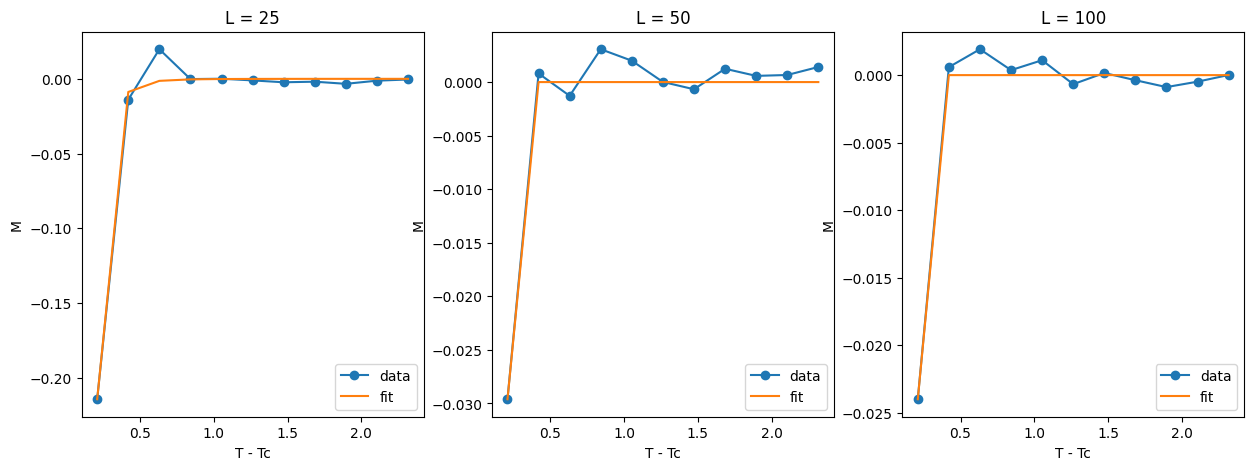

In [352]:
Tc_num = 10
fig_beta, axes_beta = plt.subplots(1,3)
Ls_M = [25, 50, 100]
for i in range(len(Ls_M)):
    # filename_M = "magnetizations_L="+str(Ls_X[i])+"_sweeps="+str(sweeps)+".txt"
    # filepath = "./data/T={:.6f}/".format(Ts[1]) 
    beta = fit_beta(Tc_num, i, all_Ms, axes_beta[i])
    axes_beta[i].set_title(f"L = {Ls_M[i]}")
    print(f"beta for L = {Ls_M[i]}: {beta}")

fig.suptitle(r"\beta estimate", size=20)
fig.legend()
fig_beta.set_size_inches(15,5)
plt.show()